# Disciplina: Planejamento e Análise Estatística de Experimentos

## Estudo Dirigido 2

### 1. Introdução

Neste estudo dirigido vamos usar os pacotes no R:
- ggplot2
- ggpubr
- tidyverse
- broom
- AICcmodavg
Para instalar estes pacontes use o comando:

In [1]:
install.packages(c("ggplot2","ggpubr","tidyverse","broom","AICcmodavg"))

Installing packages into 'C:/R/library'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked
package 'ggpubr' successfully unpacked and MD5 sums checked
package 'tidyverse' successfully unpacked and MD5 sums checked
package 'broom' successfully unpacked and MD5 sums checked
package 'AICcmodavg' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Thomás\AppData\Local\Temp\RtmpY9aqMK\downloaded_packages


Carregue os pacotes usando:

In [2]:
library(ggplot2)
library(ggpubr)
library(tidyverse)
library(broom)
library(AICcmodavg)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Agora vamos ler dados gerados para este exemplo.

É comum que os fatores sejam lidos como variáveis quantitativas ao importar um conjunto de dados para o R. Para evitar isso, você pode usar o comando `read.csv()` para ler os dados, especificando no comando se cada uma das variáveis deve ser quantitativa ("numeric") ou categórico ("factor").

Use o código a seguir, substituindo o texto do `caminho/para/seu/arquivo` pelo caminho real do seu
arquivo:

In [3]:
crop.data <- read.csv("C:/Users/Thomás/paee-estudo-dirigido-2/crop.data.csv",
                      header = TRUE, colClasses = c("factor", "factor", "factor", "numeric"))

### 2. ANOVA

Podemos realizar uma ANOVA em R usando a função `aov()`. Isso irá calcular a estatística do teste para ANOVA e determinar se há variação significativa entre os grupos formados pelos níveis da variável independente.

#### 2.1 ANOVA a um fator
No exemplo de ANOVA unidirecional, estamos modelando o rendimento da cultura em função do tipo de fertilizante usado. Primeiro, usaremos `aov()` para executar o modelo, depois usaremos `summary()` para imprimir o resumo do modelo.

In [4]:
one.way <- aov(yield ~ fertilizer, data = crop.data)
summary(one.way)

            Df Sum Sq Mean Sq F value Pr(>F)    
fertilizer   2   6.07  3.0340   7.863  7e-04 ***
Residuals   93  35.89  0.3859                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

O resumo do modelo lista as variáveis independentes que estão sendo testadas no modelo (neste caso, temos apenas uma, `fertilizer`) e os resíduos do modelo (`Residual`).

O restante dos valores na tabela de saída descrevem a variável independente e os resíduos:

- **A coluna `Df`** exibe os graus de liberdade para:
  - A variável independente (o número de níveis na variável menos 1)
  - Os graus de liberdade para os resíduos (o número total de observações menos um e menos o número de níveis nas variáveis independentes)

- **A coluna `Sum Sq`** exibe a soma dos quadrados (ou seja, a variação total entre as médias do grupo e a média geral)

- **A coluna `Mean Sq`** é a média da soma dos quadrados, calculada dividindo a soma dos quadrados pelos graus de liberdade de cada parâmetro

- **A coluna `F-value`** é a estatística de teste do teste F. Este é o quadrado médio de cada variável independente dividido pelo quadrado médio dos resíduos. Quanto maior o valor de F, mais provável é que a variação causada pela variável independente seja real e não por acaso

- **A coluna `Pr(>F)`** é o valor p da estatística F. Isso mostra quão provável é que o valor F calculado a partir do teste teria ocorrido se a hipótese nula de nenhuma diferença entre as médias dos grupos fosse verdadeira

O valor de p da variável fertilizante é baixo (p < 0,001), portanto, parece que o tipo de fertilizante utilizado tem um impacto real na produtividade final da cultura.

#### 2.2 ANOVA a dois fatores

No exemplo de ANOVA de dois fatores, estamos modelando o rendimento da cultura em função do tipo de fertilizante e da densidade de plantio. Primeiro usamos `aov()` para executar o modelo, depois usamos `summary()` para imprimir o resumo do modelo.

In [5]:
two.way <- aov(yield ~ fertilizer + density, data = crop.data)
summary(two.way)

            Df Sum Sq Mean Sq F value   Pr(>F)    
fertilizer   2  6.068   3.034   9.073 0.000253 ***
density      1  5.122   5.122  15.316 0.000174 ***
Residuals   92 30.765   0.334                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

##### 2.2.1 Adicionando interações entre variáveis  

Às vezes, você tem motivos para acreditar que duas de suas variáveis independentes têm um **efeito de interação** (não apenas um efeito aditivo).  

Por exemplo, em nosso experimento de colheita, é possível que a **densidade de plantio** afete a capacidade das plantas de absorver fertilizantes. Isso pode influenciar o efeito do tipo de fertilizante de uma forma que não é contabilizada no modelo de duas vias.  

Para testar se duas variáveis têm um efeito de interação na ANOVA, basta usar um **asterisco (`*`)** em vez de um **sinal de mais (`+`)** no modelo:

In [6]:
interaction <- aov(yield ~ fertilizer*density, data = crop.data)
summary(interaction)

                   Df Sum Sq Mean Sq F value   Pr(>F)    
fertilizer          2  6.068   3.034   9.001 0.000273 ***
density             1  5.122   5.122  15.195 0.000186 ***
fertilizer:density  2  0.428   0.214   0.635 0.532500    
Residuals          90 30.337   0.337                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Na tabela de saída, a variável `fertilizante:densidade` tem:  
- Uma **soma de quadrados baixa**  
- Um **valor-p alto**  

Isso indica que **não há evidência significativa** de que a interação entre fertilizante e densidade afete o rendimento.

---

#### 2.3 Adicionando um Bloco  

Se você agrupou seus tratamentos experimentais de alguma forma (ou se há uma **variável de confusão** que pode afetar a relação de interesse), você deve incluir essa variável como um **bloco** no modelo.  

A maneira mais simples de fazer isso é adicionar a variável com um `+`. Por exemplo, em estudos de rendimento de culturas, os tratamentos são frequentemente aplicados em **blocos** (áreas do campo que podem diferir em:  
- Textura do solo  
- Umidade  
- Exposição à luz solar  

Para controlar essas diferenças, adicionamos o **termo de blocagem** ao modelo.  

In [7]:
blocking <- aov(yield ~ fertilizer + density + block, data = crop.data)
summary(blocking)

            Df Sum Sq Mean Sq F value   Pr(>F)    
fertilizer   2  6.068   3.034   9.018 0.000269 ***
density      1  5.122   5.122  15.224 0.000184 ***
block        2  0.486   0.243   0.723 0.488329    
Residuals   90 30.278   0.336                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

A variável `block` tem:
- Um valor baixo de soma de quadrados (0.486)
- Um valor p alto (p = 0.48)

Isso indica que:
1. Provavelmente não está adicionando informação relevante ao modelo
2. Não altera a soma dos quadrados para as variáveis independentes
3. Não afeta significativamente a variação explicada na variável dependente

---

#### 2.4 Encontrando o modelo mais adequado

Atualmente temos quatro modelos ANOVA diferentes para explicar os dados. Como escolher o melhor?

**Critérios para seleção do modelo**:
O ideal é utilizar o modelo de **melhor ajuste** - aquele que melhor explica a variação na variável dependente.

**Critério de Informação de Akaike (AIC)**:
- Método robusto para avaliação de ajuste do modelo
- Calcula o valor informacional de cada modelo balanceando:
  - Variação explicada
  - Número de parâmetros utilizados

**Processo de seleção**:
Na abordagem por AIC, comparamos o valor informacional de cada modelo para identificar:
- O modelo com melhor relação entre explicação da variância e parcimônia
- O equilíbrio ideal entre complexidade e poder explicativo

In [8]:
library(AICcmodavg)
model.set <- list(one.way, two.way, interaction, blocking)
model.names <- c("one.way", "two.way", "interaction", "blocking")
aictab(model.set, modnames = model.names)

,Modnames,K,AICc,Delta_AICc,ModelLik,AICcWt,LL,Cum.Wt
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,two.way,5,173.8562,0.000000,1.000000000,0.70804078,-81.59474,0.7080408
4,blocking,7,176.9331,3.076961,0.214707131,0.15202140,-80.83019,0.8600622
3,interaction,7,177.1178,3.261693,0.195763768,0.13860873,-80.92256,0.9986709
1,one.way,4,186.4122,12.556015,0.001877137,0.00132909,-88.98630,1.0000000


##### 2.4.1 Seleção do Modelo AIC

A partir dos resultados obtidos:

- O modelo **two.way** apresenta:
  - Menor valor de AIC
  - 71% do peso do AIC
    - Isso indica que ele explica **71% da variação total** da variável dependente que pode ser explicada pelo conjunto completo de modelos

- O modelo com termo de bloco:
  - Contribui com adicional 15% do peso do AIC
  - Porém, apresenta diferença > 2 delta-AIC em relação ao melhor modelo
  - **Conclusão**: provavelmente não justifica sua inclusão nos resultados finais

**Exercício Prático**
1. Gere sua própria tabela `crop.data`
2. Replique todos os passos analíticos descritos acima

A tabela escolhida para refazer o estudo dirigido da ANOVA foram dados de publicidade em jornais locais disponível no *site*: [Cengage](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/twan/frames/frame.html). Sendo:

- **Resposta**: número de consultas resultantes do anúncio;  
- **Fator de interesse**: dia da semana (segunda a sexta);  
- **Demais variáveis**: seção do jornal (notícias, negócios, esportes);  
- **Variável de confusão**: semana da publicação, de 1 a 4.  

Nota-se que:  
- Os níveis do **fator de interesse** devem ser cada dia da semana.  
- Os níveis do **bloco** devem ser cada semana do mês.  
- As variáveis *dia da semana* e *bloco (semana)* são **categóricas**, enquanto o restante são **quantitativas**.  

Segue o método passado na função `read.csv()` do RStudio:

In [9]:
crop.data <- read.csv("C:/Users/Thomás/paee-estudo-dirigido-2/twan04.csv",
                      header = TRUE, colClasses = c("factor", "numeric", "numeric", "numeric", "numeric"))

No exemplo da ANOVA unidirecional, foi modelado o número de consultas na seção notícias do jornal em função do dia da semana. A figura a seguir apresenta a resposta obtida:

In [10]:
one.way <- aov(News ~ Day, data = crop.data)
summary(one.way)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Day          4  147.8   36.95   18.48 1.16e-05 ***
Residuals   15   30.0    2.00                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

O p-valor da variável independente é baixo (p < 0,001), portanto, parece que o dia da semana do jornal tem um impacto real no número de consultas do anúncio na seção notícias.

---

No exemplo de ANOVA a dois fatores sem interação, foi modelado o número de consultas na seção notícias em função do dia da semana e da seção negócios do jornal. A figura a seguir apresenta a resposta obtida:

In [11]:
two.way <- aov(News ~ Day + Business, data = crop.data)
summary(two.way)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Day          4 147.80   36.95  17.953 2.11e-05 ***
Business     1   1.19    1.19   0.576     0.46    
Residuals   14  28.81    2.06                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

O p-valor da variável independente seção negócios é alto (p = 0,46), então, nota-se que a seção negócios do jornal não possui impacto significativo no número de consultas do anúncio na seção notícias.

Em nosso experimento de publicidade em jornais locais, é possível que a seção negócios afete as vendas do jornal em um específico dia da semana e, consequentemente, um menor número de consultas dos anúncios. Esse efeito pode não ser contabilizado no modelo de duas vias. 

Para testar se essas duas variáveis têm efeito de interação, foi modelado o número de consultas na seção notícias em função do dia da semana e da seção negócios do jornal. A figura a seguir apresenta a resposta obtida:

In [12]:
interaction <- aov(News ~ Day*Business, data = crop.data)
summary(interaction)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Day           4 147.80   36.95  23.421 4.61e-05 ***
Business      1   1.19    1.19   0.752    0.406    
Day:Business  4  13.04    3.26   2.066    0.161    
Residuals    10  15.78    1.58                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Na tabela de saída, a variável ‘day:business’ tem um valor de soma de quadrados baixo (13,04) e um p-valor alto (0,161), o que significa que não há muita variação que possa ser explicada pela interação entre dia da semana e seção negócios do jornal.

Os tratamentos experimentais foram agrupados em quatro blocos, isto é, divididos em quatro semanas do mês. Foi incluído este elemento no modelo e a resposta é apresentada na imagem a seguir:

In [13]:
blocking <- aov(News ~ Day + Business + block, data = crop.data)
summary(blocking)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Day          4 147.80   36.95  17.806 3.45e-05 ***
Business     1   1.19    1.19   0.572    0.463    
block        1   1.84    1.84   0.885    0.364    
Residuals   13  26.98    2.08                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

A variável ‘block’ tem um valor baixo de soma de quadrados (1,84) e um valor p alto (p = 0,364), então provavelmente não está adicionando muita informação ao modelo. Além disso, ao se comparar com os resultados anteriores, também não altera a soma dos quadrados para as duas variáveis independentes, o que significa que não afeta quanta variação na variável dependente elas explicam.

Na seleção do modelo AIC, comparamos o valor da informação de cada modelo e escolhemos aquele com o menor valor AIC (um número menor significa mais informações explicadas). A imagem a seguir dispõe a tabela de saída:

In [14]:
library(AICcmodavg)
model.set <- list(one.way, two.way, interaction, blocking)
model.names <- c("one.way", "two.way", "interaction", "blocking")
aictab(model.set, modnames = model.names)

,Modnames,K,AICc,Delta_AICc,ModelLik,AICcWt,LL,Cum.Wt
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,one.way,6,83.32838,0.000000,1.000000e+00,8.731736e-01,-32.43342,0.8731736
2,two.way,7,87.39327,4.064884,1.310152e-01,1.143990e-01,-32.02997,0.9875726
4,blocking,8,91.83386,8.505476,1.422523e-02,1.242110e-02,-31.37147,0.9999937
3,interaction,11,107.01357,23.685187,7.191625e-06,6.279537e-06,-26.00678,1.0000000


A partir desses resultados conclui-se que o modelo 'one.way' é o mais adequado, porque apresentou o um valor nulo de AIC e 87\% do peso do AIC. Ou seja, ele explica 87\% da variação total da variável dependente que pode ser explicada pelo conjunto completo de modelos.

### 3. Estatística Não Paramétrica
Vamos começar criando uma população com distribuição assimétrica:

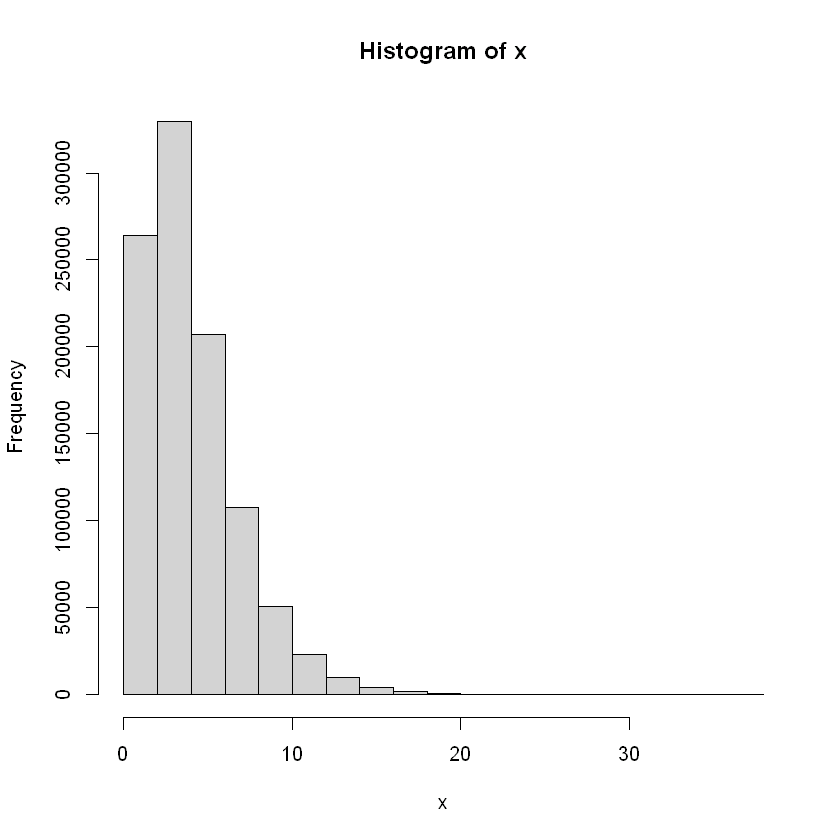

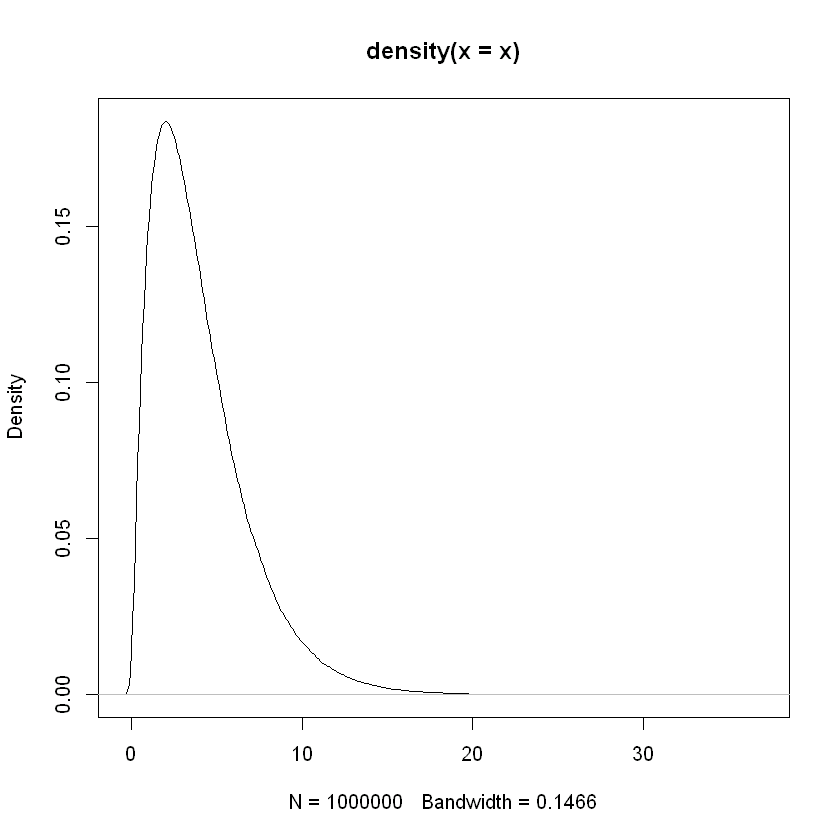

In [15]:
# Generate gamma-distributed population (shape=2, rate=0.5)
x <- rgamma(1000000, 2, 0.5)

# Visualize population distribution
hist(x)
plot(density(x))

Vamos realizar uma amostragem de tamanho 30 desta população assimétrica:

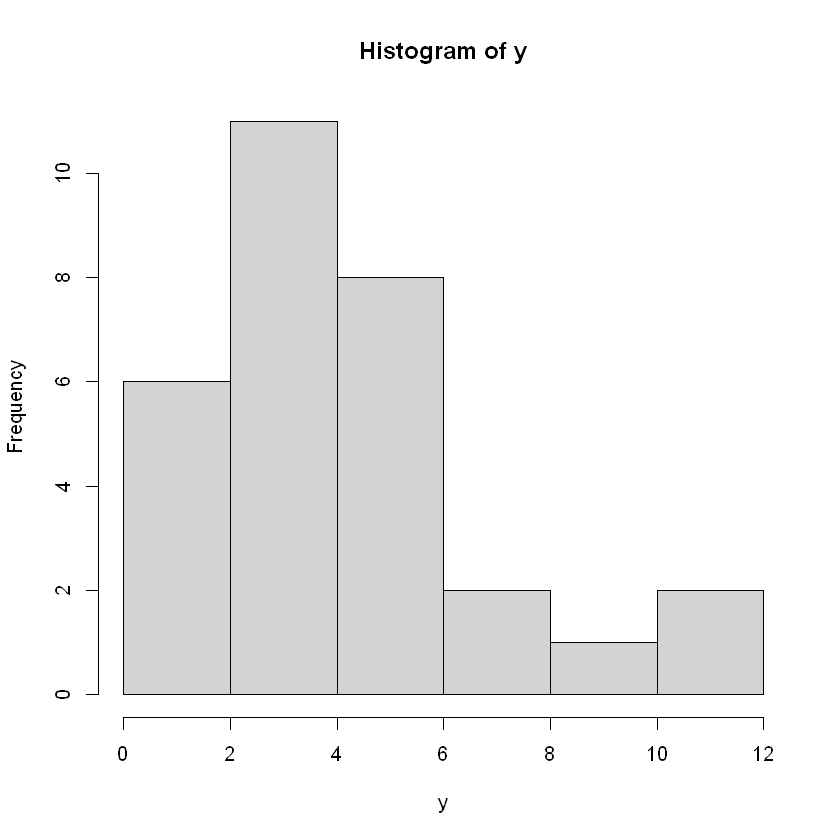

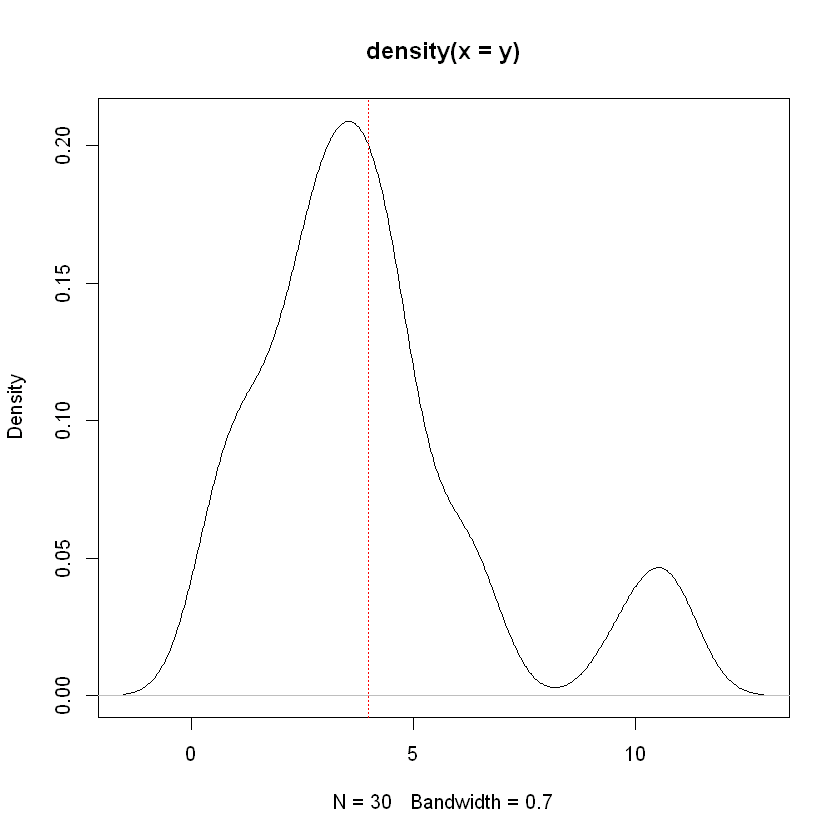

In [16]:
# Take one sample of size 30
y <- sample(x, 30)
hist(y)
plot(density(y))
abline(v = mean(x), lty = 3, col = "red")  # Changed pch to lty for abline

Verificando se a variável `y` segue distribuição normal

**Hipóteses estatísticas:**
- **H₀**: A amostra foi gerada de uma distribuição normal
- **Hₐ**: A amostra não foi gerada de uma distribuição normal

**Teste de Shapiro-Wilk** (α = 0.05):## 3.3 Simulação de Teste Paramétrico

### Configuração do teste
Seja `a = mean(x)`. Vamos realizar o seguinte teste paramétrico:

**Hipóteses:**
- **H₀**: μ = a
- **Hₐ**: μ ≠ a

**Objetivo:**  
Verificar se o teste mantém a taxa nominal de erro Tipo I (5% de significância).

### Metodologia de simulação:
1. Definir parâmetros:
```r
a <- mean(x)
n <- 30          # Tamanho amostral
alpha <- 0.05    # Nível de significância
nsim <- 10000    # Número de simulações

In [17]:
shapiro.test(y)  # Will typically reject for gamma-distributed data


	Shapiro-Wilk normality test

data:  y
W = 0.87563, p-value = 0.002241


Sabe-se que a média populacional de nossa variável x é igual a:

In [18]:
mean(x)

[1] 3.999962

Vamos ver se o TCL vale para amostras de uma distribuição assimétrica (apenas visualmente):

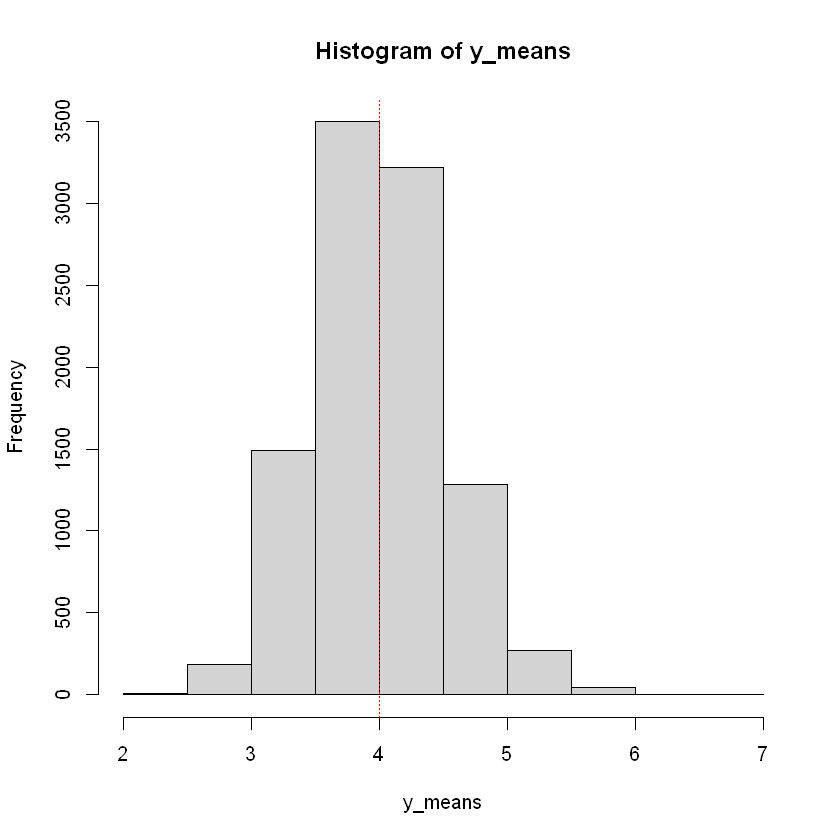

[1] 3.995792

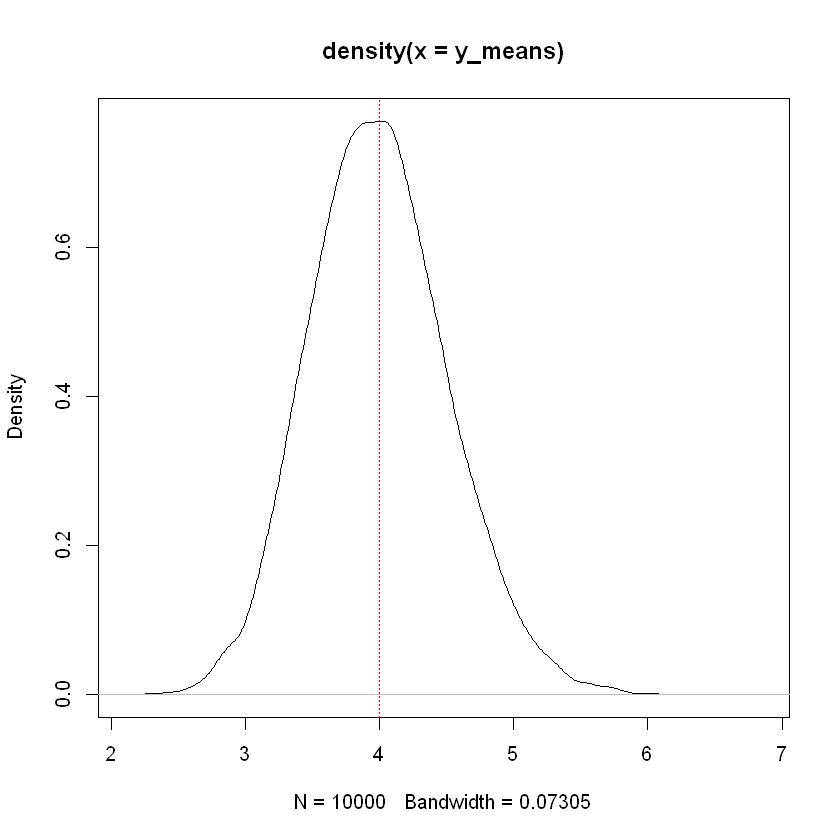

In [19]:
# Simulate sampling distribution of the mean (CLT demonstration)
n <- 30
y_means <- numeric(10000)  # Better to pre-allocate
for(i in 1:10000) {
  y_means[i] <- mean(sample(x, n))
}
hist(y_means)
abline(v = mean(x), lty = 3, col = "red")
plot(density(y_means))
abline(v = mean(x), lty = 3, col = "red")
mean(y_means)  # Should be close to population mean

Seja `a = mean(x)`. Vamos fazer o seguinte teste paramétrico:

**Hipóteses:**
- **H₀**: μ = a
- **Hₐ**: μ ≠ a

Vamos verificar se o teste faz a conclusão correta (não rejeitar H₀ com 5% de significância). Se o teste funcionar para esta distribuição, ele rejeitará H₀ (já que ela é correta) em apenas 5% das vezes.

Para isto vamos repetir o teste para "infinitas" amostras de tamanho 30 e, para cada amostra, vamos testar o teste acima e verificar se o p-valor é maior que o nível de significância. No final iremos contar quantas vezes a hipótese nula não foi rejeitada. A quantidade `1 - p/10000` é a proporção de vezes que a hipótese nula foi rejeitada. (Se o TCL funciona, é esperado que este número seja aproximadamente igual a α).

In [20]:
# Calculate empirical Type I error rate (should be ≈0.05)
a <- mean(x)
p <- 0
n <- 30
for(i in 1:10000) {
  y_sample <- sample(x, n)  # Store sample separately
  p <- p + ifelse(t.test(y_sample, mu = a)$p.value > 0.05, 0, 1)
}
type_I_error_rate <- p/10000
type_I_error_rate

[1] 0.062

1. Quais as conclusões deste exercício?
3. Diminua o tamanho das amostras e veja o que acontece ($n < 30$).
4. Repita o procedimento de teste mas agora gere duas amostras assimétricas e faça um teste t pareado.

Para avaliar se a amostra $y$ foi gerada de uma população normalmente distribuída, isto é, paramétrica, foi usado o teste de Shapiro-Wilk.

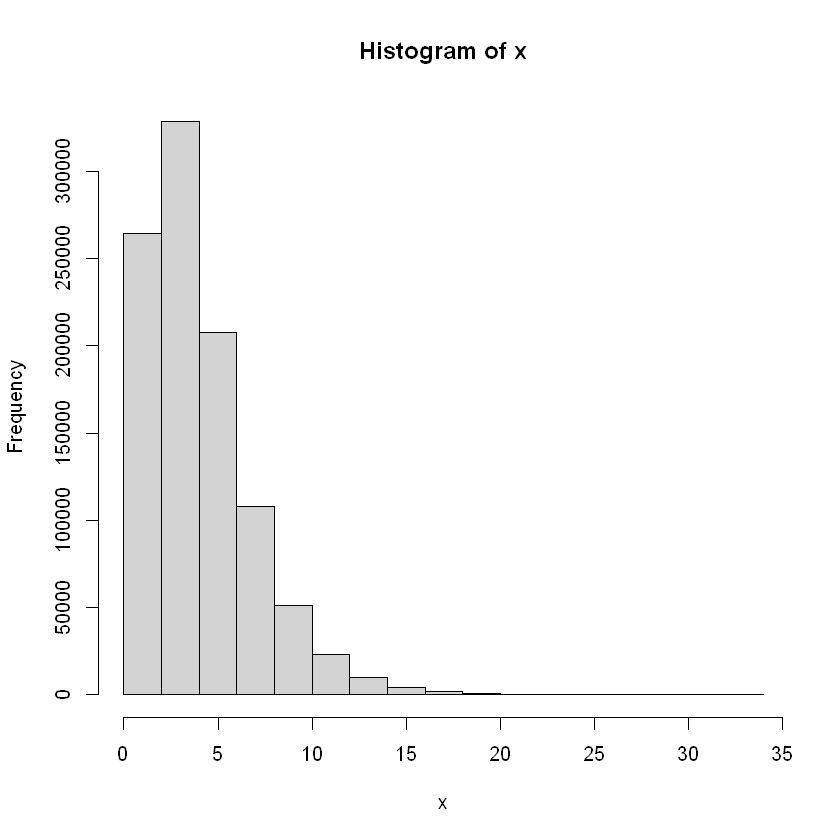

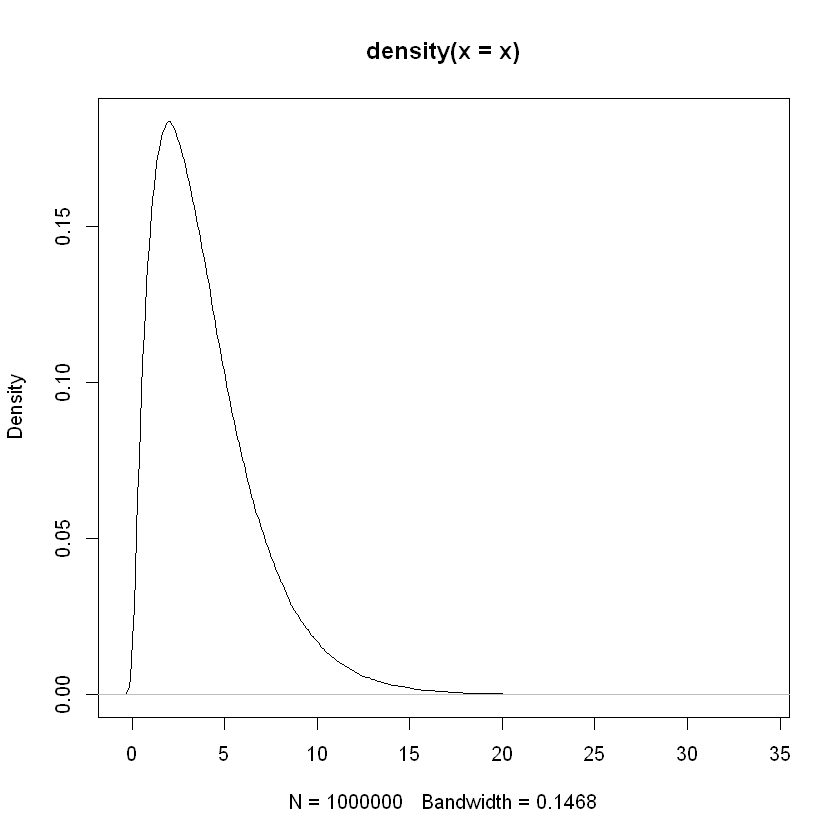

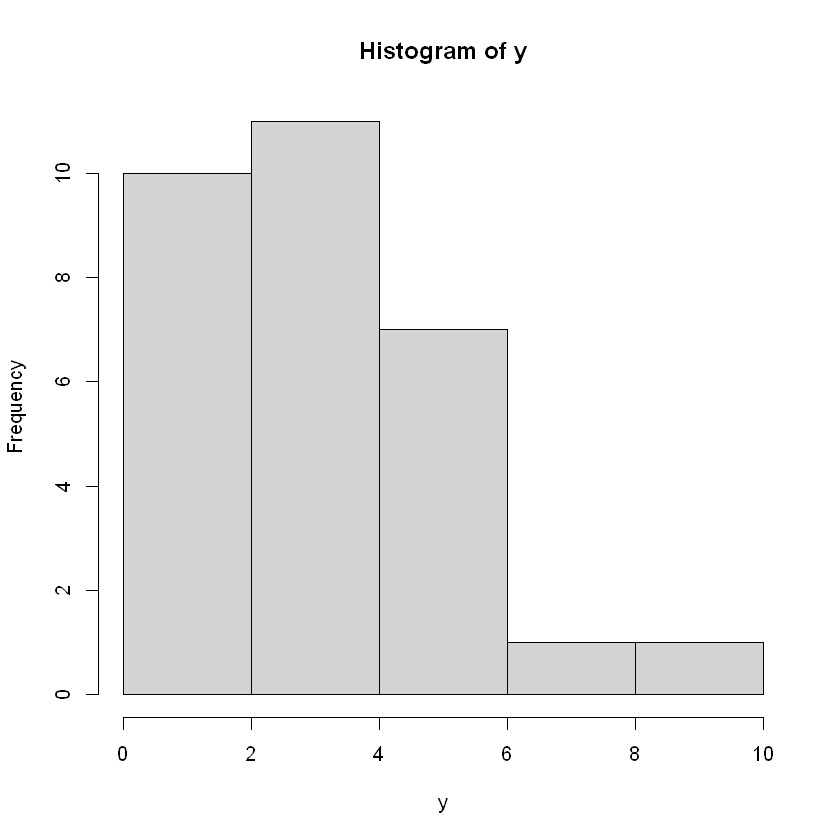


	Shapiro-Wilk normality test

data:  y
W = 0.91584, p-value = 0.02095


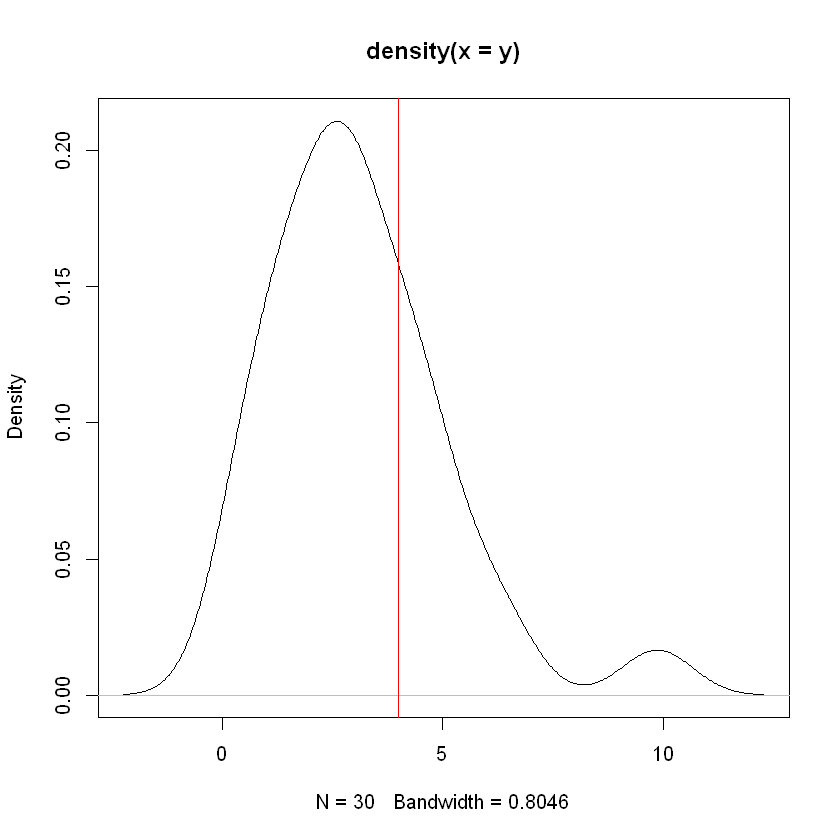

In [21]:
x = rgamma(1000000, 2, 0.5)
hist(x)
plot(density(x))
y = sample(x, 30)
hist(y)
plot(density(y))
abline(v = mean(x), pch = 3, col = "red")
shapiro.test(y)

Nota-se que o p-valor (0,007917) é menor que o nível de significância $\alpha$ (0,05), então a hipótese nula é rejeitada e leva-se em consideração a hipótese alternativa: a amostra não foi gerada de uma distribuição normalmente distribuída.

Foi executado o algoritmo para verificar, visualmente, se o Teorema Central do Limite (TCL) vale para amostras de uma distribuição assimétrica. Os resultados estão dispostos nas duas imagens a seguir — a primeira apresenta o console do programa e a segunda, o diagrama de densidade das 10000 médias amostrais:

[1] 4.001296

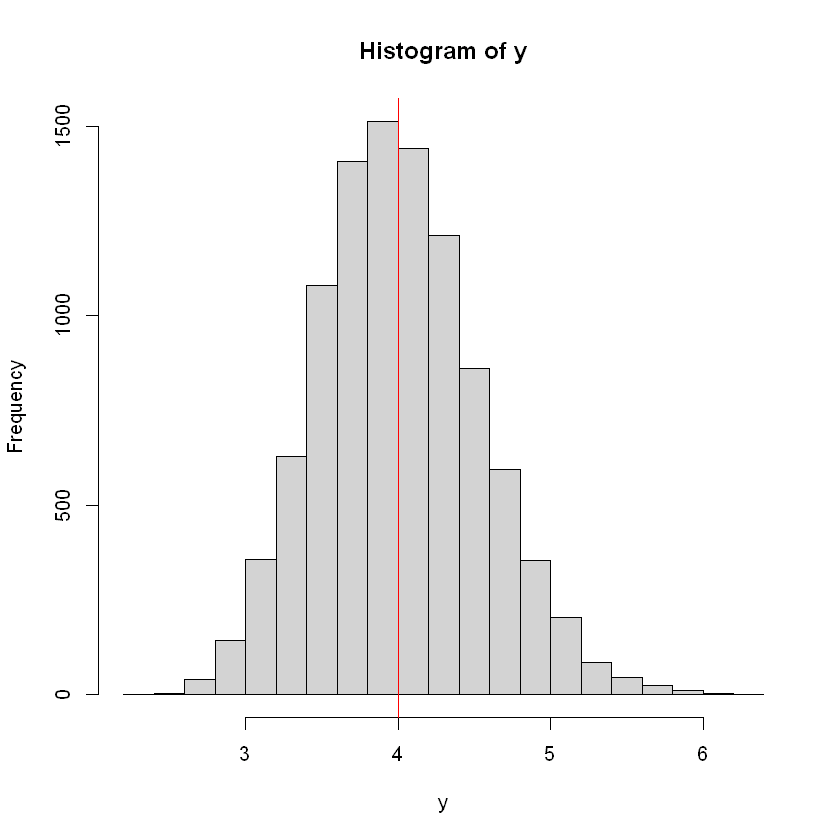

[1] 4.005043

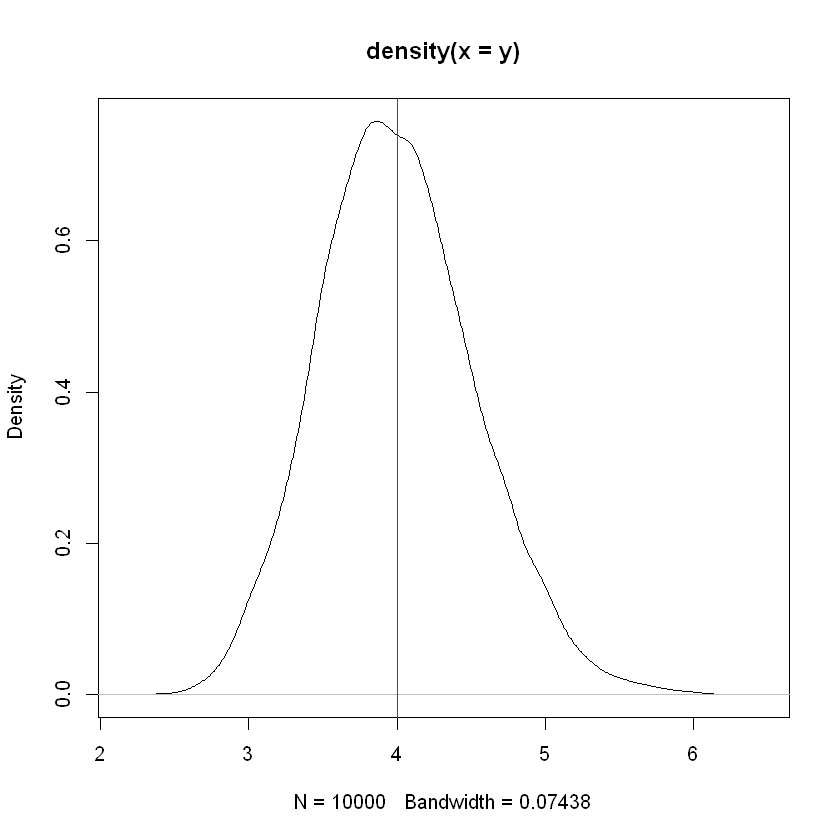

In [22]:
mean(x)
n = 30
y = NULL
for (i in 1:10000) {
  y[i] = mean(sample(x, n))
}
hist(y)
abline(v = mean(x), pch = 3, col = "red")
plot(density(y))
abline(v = mean(x), pch = 3, col = "red")
mean(y)

Percebe-se que a média populacional e a média das médias amostrais são praticamente iguais. Além disso, visualmente, o diagrama de densidade confirma que o TCL vale para amostras de uma distribuição populacional assimétrica, pois a distribuição das médias tende a ser aproximadamente normal.

Para reafirmar essa conclusão sobre o TCL, foi realizado um teste de hipóteses 10000 vezes com $\alpha=0,05$, verificando a igualdade entre a média populacional e a média amostral. A hipótese nula assume que não há diferença entre elas.

Se o TCL funciona, espera-se que a hipótese nula seja rejeitada em aproximadamente $5\%$ das vezes (ou seja, a proporção de rejeições deve ser próxima de $\alpha$).

In [23]:
a = mean(x)
p = 0
n = 30
for (i in 1:10000) {
  y_sample = sample(x, n)
  p = ifelse(t.test(y_sample, mu = a)$p.value > 0.05, 1, 0) + p
}
1 - p / 10000

[1] 0.0571

O número 0,0571 é próximo de 0,05 e é admissível concluir que, para um tamanho de amostra $N = 30$, as médias são iguais e a inferência estatística está correta. Portanto, o TCL vale para amostras de uma distribuição populacional assimétrica.

---

A seguir estão dispostos mais dois resultados para esta análise com tamanho de amostra $N = 20$ e $N = 60$, respectivamente:

In [24]:
a = mean(x)
p = 0
n = 20
for (i in 1:10000) {
  y_sample = sample(x, n)
  p = ifelse(t.test(y_sample, mu = a)$p.value > 0.05, 1, 0) + p
}
1 - p / 10000


[1] 0.07

In [25]:
a = mean(x)
p = 0
n = 60
for (i in 1:10000) {
  y_sample = sample(x, n)
  p = ifelse(t.test(y_sample, mu = a)$p.value > 0.05, 1, 0) + p
}
1 - p / 10000


[1] 0.0586

Comparando estas novas duas respostas com a anterior ($N = 30$), conclui-se que, ao reduzir o tamanho da amostra para 20, obtém-se mais rejeição da hipótese nula, porque cada amostragem não representa uma parte significativa da distribuição real da população, afetando a média amostral. Com o tamanho da amostra igual a 60, nota-se esta afirmativa em contrapartida.

---

Para o teste t pareado foram geradas duas amostras assimétricas de tamanho 30 da mesma população, ou seja, dependentes conforme pré-requisito para o teste.

In [26]:
a = mean(x)
p = 0
n = 30
for (i in 1:10000) {
  y1 = sample(x, n)
  y2 = sample(x, n)
  p = ifelse(t.test(x = y1, y = y2, paired = TRUE)$p.value > 0.05, 1, 0) + p
}
1 - p / 10000


[1] 0.0495

Feito isso, foi realizado um teste de Shapiro-Wilk da diferença entre as variáveis das amostras.

In [27]:
shapiro.test(y1-y2)


	Shapiro-Wilk normality test

data:  y1 - y2
W = 0.96929, p-value = 0.5198


Portanto, existe normalidade na distribuição desta diferença e o teste t pareado pode ser aplicado, assim segue o resultado obtido:

In [28]:
a=mean(x)
p=0
n=30
y1=NULL
y2=NULL
for(i in 1:10000){
  y1=sample(x,n)
  y2=sample(x,n)
  p=ifelse(t.test(x=y1,y=y2,paired=TRUE)$p.value>0.05,1,0)+p
}
1-p/10000

[1] 0.0484

Vale ressaltar que a hipótese nula para este teste é que a diferença entre as médias amostrais é aproximadamente zero. Realizando este teste 10000 vezes, conclui-se que a hipótese nula foi rejeitada $4,84\%$ das vezes, ou seja, bem próximo do nível de significância 0,05 escolhido para este teste. Desta forma, tem-se um indicativo seguro de que, qualquer que seja a amostra ($N > 30$) da população, elas tendem a manter a média igual à da população.